In [2]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score
import math
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cols ="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""
  
columns =cols.split(",")
for i in range(len(columns)):
    columns[i]=columns[i].strip("\n")
# for c in cols.split(', '):
# #     if(c.strip()):
# #        columns.append(c.strip())
  
print(columns)
columns.append('target')
print(len(columns))

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
42


In [5]:
df = pd.read_csv("/content/drive/My Drive/assignment5/full.csv",names=columns)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.00,1,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,2,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.00,3,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.00,4,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,tcp,http,SF,212,2288,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,32,0.0,0.0,0.0,0.0,1.0,0.0,0.16,3,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.
4898427,0,tcp,http,SF,219,236,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,33,0.0,0.0,0.0,0.0,1.0,0.0,0.15,4,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.
4898428,0,tcp,http,SF,218,3610,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,34,0.0,0.0,0.0,0.0,1.0,0.0,0.15,5,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.
4898429,0,tcp,http,SF,219,1234,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,35,0.0,0.0,0.0,0.0,1.0,0.0,0.14,6,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.


In [6]:
df=df.reset_index(drop=True)

In [7]:
df["target"].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [8]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [9]:
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [10]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4898431.0,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06
mean,4.834243e+01,1.834621e+03,1.093623e+03,5.716116e-06,6.487792e-04,7.961733e-06,1.243766e-02,3.205108e-05,1.435290e-01,8.088304e-03,6.818510e-05,3.674646e-05,1.293496e-02,1.188748e-03,7.430951e-05,1.021143e-03,0.0,4.082940e-07,8.351654e-04,3.349734e+02,2.952671e+02,1.779703e-01,1.780370e-01,5.766509e-02,5.773010e-02,7.898842e-01,2.117961e-02,2.826080e-02,2.329811e+02,1.892142e+02,7.537132e-01,3.071111e-02,6.050520e-01,6.464107e-03,1.780911e-01,1.778859e-01,5.792780e-02,5.765941e-02
std,7.233298e+02,9.414311e+05,6.450123e+05,2.390833e-03,4.285434e-02,7.215084e-03,4.689782e-01,7.299408e-03,3.506116e-01,3.856481e+00,8.257146e-03,8.082432e-03,3.938075e+00,1.241857e-01,8.737590e-03,3.551048e-02,0.0,6.389788e-04,2.888716e-02,2.119908e+02,2.459927e+02,3.818756e-01,3.822541e-01,2.322529e-01,2.326604e-01,3.892958e-01,8.271458e-02,1.405596e-01,6.402094e+01,1.059128e+02,4.111860e-01,1.085432e-01,4.809877e-01,4.125978e-02,3.818382e-01,3.821774e-01,2.309428e-01,2.309777e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.210000e+02,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,4.900000e+01,4.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,5.100000e+02,5.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,5.110000e+02,5.110000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,2.550000e+02,1.000000e+00,4.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.

In [11]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [12]:
num_cols = df._get_numeric_data().columns
  
cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')
  
cate_cols

['flag', 'protocol_type', 'service']

In [13]:
df = df.dropna('columns')# drop columns with NaN
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,normal.,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.00,1,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,2,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.00,3,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.,normal
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.00,4,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,tcp,http,SF,212,2288,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,32,0.0,0.0,0.0,0.0,1.0,0.0,0.16,3,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.,normal
4898427,0,tcp,http,SF,219,236,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,33,0.0,0.0,0.0,0.0,1.0,0.0,0.15,4,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.,normal
4898428,0,tcp,http,SF,218,3610,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,34,0.0,0.0,0.0,0.0,1.0,0.0,0.15,5,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.,normal
4898429,0,tcp,http,SF,219,1234,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,35,0.0,0.0,0.0,0.0,1.0,0.0,0.14,6,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.,normal


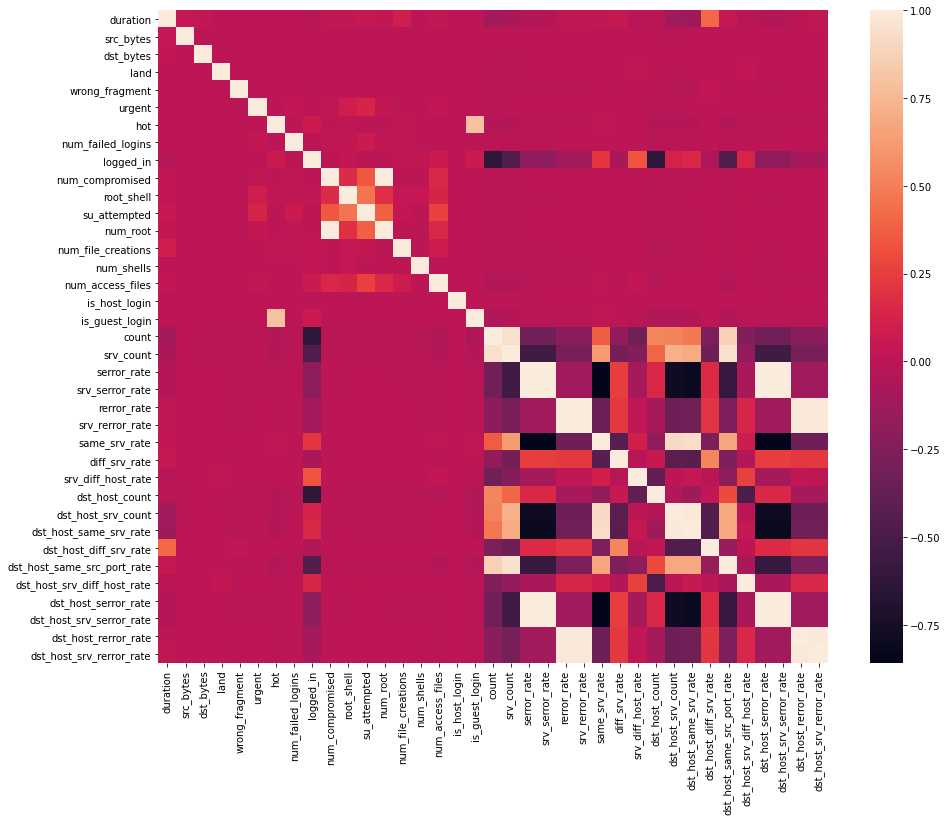

In [14]:

  
df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values
  
corr = df.corr()
  
plt.figure(figsize =(15, 12))
  
sns.heatmap(corr)
  
plt.show()

In [15]:
corr

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,4.122055e-02,0.020392,-0.000160,-0.001012,3.765465e-03,0.004450,0.007412,-0.020624,0.027126,0.026378,0.052088,0.028718,0.095068,-0.000460,0.023524,-2.106206e-05,0.002389,-0.105074,-0.079863,-0.031098,-0.031110,0.016549,0.016836,0.021719,0.050286,-0.012754,0.010914,-0.117309,-0.119105,0.409009,0.042774,-0.008582,-0.030546,-0.030570,0.010569,0.016034
src_bytes,0.041221,1.000000e+00,0.000239,-0.000005,-0.000027,-8.677487e-08,0.000782,-0.000007,0.000200,0.000005,-0.000006,-0.000004,-0.000002,0.000037,0.000022,-0.000022,-1.084695e-06,-0.000036,-0.001663,-0.001151,-0.000586,-0.000632,0.003210,0.003287,0.000670,0.000329,-0.000142,-0.002416,-0.001715,-0.001548,0.000719,-0.000793,0.000005,-0.000821,-0.000635,-0.000154,0.002927
dst_bytes,0.020392,2.393376e-04,1.000000,-0.000004,-0.000026,1.645208e-04,0.000126,0.000632,0.002119,0.001307,0.000988,0.001204,0.001303,0.000256,-0.000011,0.000352,4.213097e-06,0.000035,-0.002646,-0.001998,-0.000774,-0.000773,0.002463,0.002467,0.000910,-0.000393,0.000311,-0.001534,-0.001067,-0.000968,0.003307,-0.000558,0.000346,-0.000765,-0.000763,0.002502,0.002512
land,-0.000160,-4.659182e-06,-0.000004,1.000000,-0.000036,-2.638263e-06,-0.000063,-0.000010,-0.000979,-0.000005,-0.000020,-0.000011,-0.000008,-0.000023,-0.000020,-0.000069,-1.527701e-06,-0.000069,-0.003735,-0.002852,0.004997,0.005141,-0.000347,-0.000593,0.000926,0.000503,0.013491,-0.008610,-0.004174,0.000865,-0.000236,0.001479,0.033193,0.004648,0.003096,-0.000552,-0.000597
wrong_fragment,-0.001012,-2.714937e-05,-0.000026,-0.000036,1.000000,-1.670585e-05,-0.000402,-0.000066,-0.006197,-0.000032,-0.000125,-0.000069,-0.000050,-0.000145,-0.000129,-0.000435,-9.673614e-06,-0.000438,-0.019948,-0.015326,-0.004469,-0.007051,-0.003663,-0.003756,0.005574,-0.002267,0.000128,-0.001786,-0.018699,-0.017398,0.022974,-0.010194,0.003998,-0.006090,-0.007047,0.009444,-0.003779
urgent,0.003765,-8.677487e-08,0.000165,-0.000003,-0.000017,1.000000e+00,0.003591,0.031005,0.002534,0.017680,0.089084,0.133023,0.030985,0.012065,0.003229,0.023872,-7.051035e-07,-0.000032,-0.001738,-0.001320,-0.000514,-0.000514,-0.000274,-0.000274,0.000596,-0.000283,-0.000222,-0.002786,-0.001897,-0.001549,0.001864,-0.001047,0.002508,-0.000420,-0.000514,-0.000277,-0.000275
hot,0.004450,7.822053e-04,0.000126,-0.000063,-0.000402,3.590666e-03,1.000000,0.004475,0.064579,0.002688,0.017916,0.001926,0.002014,0.019887,0.001717,0.000586,1.345546e-03,0.803830,-0.041733,-0.031680,-0.012129,-0.012129,-0.005913,-0.005480,0.013001,0.004396,-0.000459,-0.035657,-0.033378,-0.025424,0.008587,-0.031651,-0.002604,-0.011951,-0.012134,-0.005112,-0.005434
num_failed_logins,0.007412,-6.921906e-06,0.000632,-0.000010,-0.000066,3.100532e-02,0.004475,1.000000,0.001792,0.019542,0.023673,0.069186,0.018571,0.014371,-0.000037,0.001449,-2.805703e-06,0.004714,-0.006912,-0.005249,-0.001680,-0.001826,0.006015,0.006003,0.002124,0.000617,-0.000883,-0.009862,-0.006975,-0.002832,0.001561,-0.004758,0.004145,-0.001002,-0.001191,0.005063,0.004973
logged_in,-0.020624,1.998519e-04,0.002119,-0.000979,-0.006197,2.534183e-03,0.064579,0.001792,1.000000,0.005123,0.020172,0.011106,0.008024,0.023374,0.020775,0.070245,1.560893e-03,0.070524,-0.630938,-0.473230,-0.189029,-0.188521,-0.099425,-0.096942,0.216538,-0.070580,0.337734,-0.628391,0.125516,0.157486,-0.058789,-0.460501,0.139515,-0.188372,-0.189129,-0.090709,-0.088119
num_compromised,0.027126,4.832481e-06,0.001307,-0.000005,-0.000032

In [16]:
# This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root', axis = 1, inplace = True)
  
# This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate', axis = 1, inplace = True)
  
# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate', axis = 1, inplace = True)
  
# This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)
  
# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate', axis = 1, inplace = True)
  
# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate', axis = 1, inplace = True)
  
# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)
  
# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)
 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,0.0,0.00,0,0,0.0,0.00,0.00,normal.,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.0,0.0,0.00,1,1,0.0,1.00,0.00,normal.,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,0.0,0.00,2,2,0.0,0.50,0.00,normal.,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.0,0.0,0.00,3,3,0.0,0.33,0.00,normal.,normal
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,3,0.0,0.0,1.0,0.0,0.00,4,4,0.0,0.25,0.00,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,tcp,http,SF,212,2288,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,32,0.0,0.0,1.0,0.0,0.16,3,255,0.0,0.33,0.05,normal.,normal
4898427,0,tcp,http,SF,219,236,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,33,0.0,0.0,1.0,0.0,0.15,4,255,0.0,0.25,0.05,normal.,normal
4898428,0,tcp,http,SF,218,3610,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,34,0.0,0.0,1.0,0.0,0.15,5,255,0.0,0.20,0.05,normal.,normal
4898429,0,tcp,http,SF,219,1234,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,35,0.0,0.0,1.0,0.0,0.14,6,255,0.0,0.17,0.05,normal.,normal


In [19]:
 
# protocol_type feature mapping
pmap = {'icmp':0, 'tcp':1, 'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [20]:
 
# flag feature mapping
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10}
df['flag'] = df['flag'].map(fmap)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [21]:
df.drop('service', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [23]:
 
# Splitting the dataset
df = df.drop(['target', ], axis = 1)
print(df.shape)
df=df[:50000]
  
df

(4898431, 32)


,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,Attack Type
0,0,1,0,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0.00,0.0,1.0,0.0,0.00,0,0,0.0,0.00,0.0,normal
1,0,1,0,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,2,0.00,0.0,1.0,0.0,0.00,1,1,0.0,1.00,0.0,normal
2,0,1,0,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0.00,0.0,1.0,0.0,0.00,2,2,0.0,0.50,0.0,normal
3,0,1,0,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,2,0.00,0.0,1.0,0.0,0.00,3,3,0.0,0.33,0.0,normal
4,0,1,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,3,0.00,0.0,1.0,0.0,0.00,4,4,0.0,0.25,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,1,0,309,412,0,0,0,0,0,1,0,0,0,0,0,0,0,0,18,19,0.06,0.0,1.0,0.0,0.11,255,255,0.0,0.00,0.0,normal
49996,0,1,0,325,835,0,0,0,0,0,1,0,0,0,0,0,0,0,0,19,20,0.05,0.0,1.0,0.0,0.10,255,255,0.0,0.00,0.0,normal
49997,0,1,0,324,1761,0,0,0,0,0,1,0,0,0,0,0,0,0,0,20,21,0.05,0.0,1.0,0.0,0.10,255,255,0.0,0.00,0.0,normal
49998,0,1,0,324,1538,0,0,0,0,0,1,0,0,0,0,0,0,0,0,21,22,0.05,0.0,1.0,0.0,0.09,255,255,0.0,0.00,0.0,normal


In [24]:
# Target variable and train set
y = df[['Attack Type']]
X = df.drop(['Attack Type', ], axis = 1)
  
sc = MinMaxScaler()
X = sc.fit_transform(X)
  
# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(33500, 31) (16500, 31)
(33500, 1) (16500, 1)


In [25]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
  
clfg = GaussianNB()
start_time = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.05833101272583008


In [26]:
 
start_time = time.time()
y_test_pred = clfg.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.027095794677734375


In [27]:
 
print("Train score is:", clfg.score(X_train, y_train))
print("Test score is:", clfg.score(X_test, y_test))

Train score is: 1.0
Test score is: 0.9998787878787879


In [28]:
 
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
  
clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start_time = time.time()
clfd.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.060065507888793945


In [29]:
 
start_time = time.time()
y_test_pred = clfd.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.007085323333740234


In [30]:
print("Train score is:", clfd.score(X_train, y_train))
print("Test score is:", clfd.score(X_test, y_test))

Train score is: 1.0
Test score is: 0.9998787878787879


In [31]:
 
from sklearn.ensemble import RandomForestClassifier
  
clfr = RandomForestClassifier(n_estimators = 30)
start_time = time.time()
clfr.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.2874596118927002


In [32]:
 
start_time = time.time()
y_test_pred = clfr.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.06389474868774414


In [33]:
print("Train score is:", clfr.score(X_train, y_train))
print("Test score is:", clfr.score(X_test, y_test))
 

Train score is: 1.0
Test score is: 0.9998787878787879


In [34]:
from sklearn.svm import SVC
  
clfs = SVC(gamma = 'scale')
start_time = time.time()
clfs.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.10753583908081055


In [35]:
start_time = time.time()
y_test_pred = clfs.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.04750967025756836


In [36]:
print("Train score is:", clfs.score(X_train, y_train))
print("Test score is:", clfs.score(X_test, y_test))

Train score is: 0.9999402985074627
Test score is: 0.9998787878787879


In [37]:
 
from sklearn.linear_model import LogisticRegression
  
clfl = LogisticRegression(max_iter = 1200000)
start_time = time.time()
clfl.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.2205960750579834


In [38]:
 
start_time = time.time()
y_test_pred = clfl.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.009042739868164062


In [39]:
print("Train score is:", clfl.score(X_train, y_train))
print("Test score is:", clfl.score(X_test, y_test))

Train score is: 0.9999402985074627
Test score is: 0.9998787878787879


In [40]:
 
from sklearn.ensemble import GradientBoostingClassifier
  
clfg = GradientBoostingClassifier(random_state = 0)
start_time = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.5149805545806885


In [41]:
 
start_time = time.time()
y_test_pred = clfg.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.023787975311279297


In [42]:
 
print("Train score is:", clfg.score(X_train, y_train))
print("Test score is:", clfg.score(X_test, y_test))

Train score is: 1.0
Test score is: 0.9999393939393939


<BarContainer object of 6 artists>

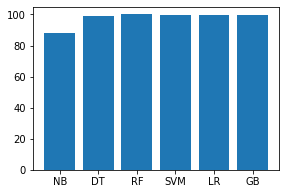

In [43]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [87.951, 99.058, 99.997, 99.875, 99.352, 99.793]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)

<BarContainer object of 6 artists>

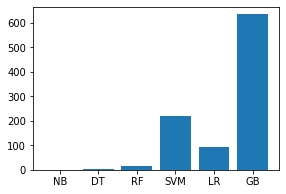

In [44]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [1.11452, 2.44087, 17.08491, 218.26840, 92.94222, 633.229]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)

<BarContainer object of 6 artists>

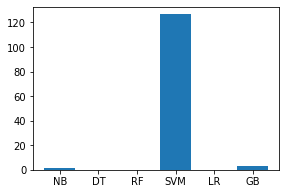

In [45]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [1.54329, 0.14877, 0.199471, 126.50875, 0.09605, 2.95039]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)